In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df= pd.read_parquet(r"C:\Users\brand\UNISA_Honour_Fake_News_Program\Dataset_Merged_BackUp\ForModeling.parquet")


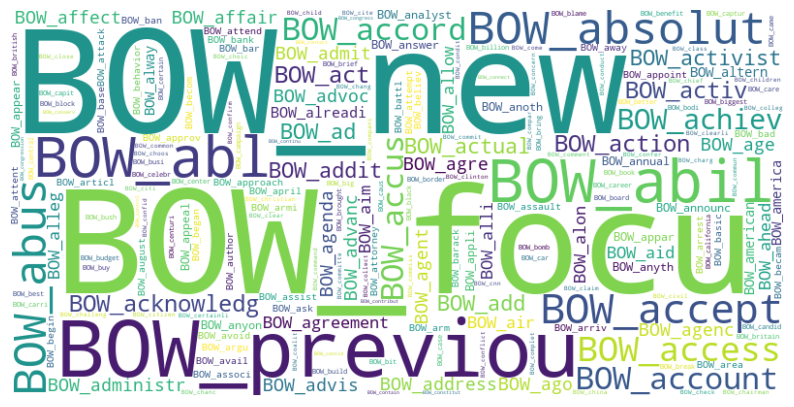

In [3]:
last_1000_columns = df.columns[-1000:]

# Concatenate column names into a single string
text = ' '.join(last_1000_columns)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [4]:
last_1000_columns = df.iloc[:, -1000:]

# Create a new DataFrame to store counts for label_zero and label_one
new_df = pd.DataFrame(index=last_1000_columns.columns)

# Calculate count of 1s where 'label' == 0 and store it in 'label_zero'
new_df['label_zero'] = last_1000_columns[df['label'] == 0].sum()

# Calculate count of 1s where 'label' == 1 and store it in 'label_one'
new_df['label_one'] = last_1000_columns[df['label'] == 1].sum()

# Display the new DataFrame
print(new_df)

             label_zero  label_one
BOW_abil            935       1656
BOW_abl            2451       3089
BOW_absolut        1901       1000
BOW_abus            894       1320
BOW_accept         1572       2567
...                 ...        ...
BOW_ye             1430       1006
BOW_year           8706      16561
BOW_yearold        1406       1842
BOW_york           2579       5783
BOW_young          1607       2352

[1000 rows x 2 columns]


                label_zero  label_one  difference
BOW_reuter             333      20047       19714
BOW_said             12171      28486       16315
BOW_presid            9458      18449        8991
BOW_state             9755      18271        8516
BOW_washington        2946      11002        8056
BOW_year              8706      16561        7855
BOW_includ            5369      12845        7476
BOW_told              5478      12792        7314
BOW_govern            4896      12177        7281
BOW_week              4462      11392        6930


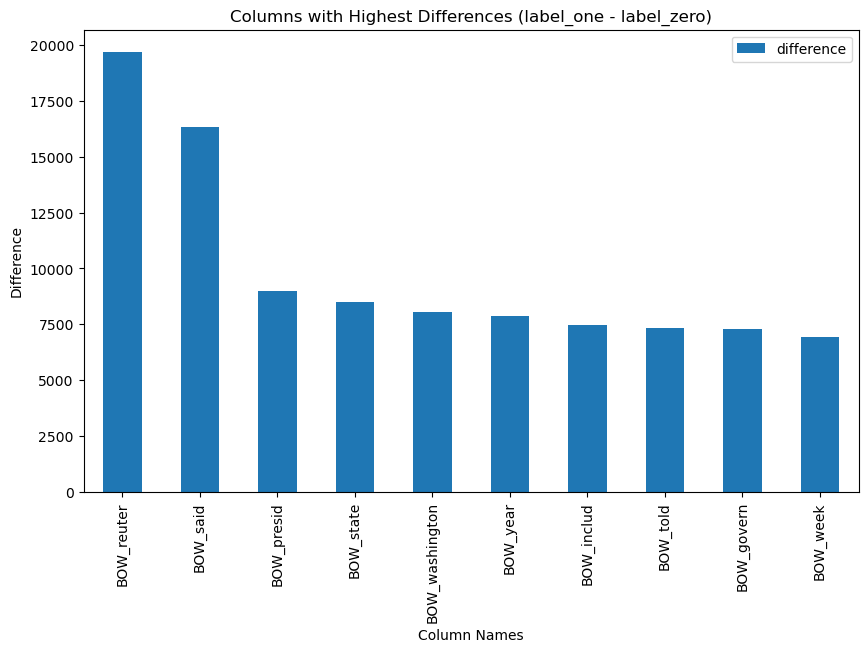

In [5]:
new_df['difference'] = new_df['label_one'] - new_df['label_zero']

# Display columns with the highest differences
top_differences = new_df.nlargest(10, 'difference')
print(top_differences)
top_differences.plot(kind='bar', y='difference', figsize=(10, 6))
plt.title('Columns with Highest Differences (label_one - label_zero)')
plt.xlabel('Column Names')
plt.ylabel('Difference')
plt.show()

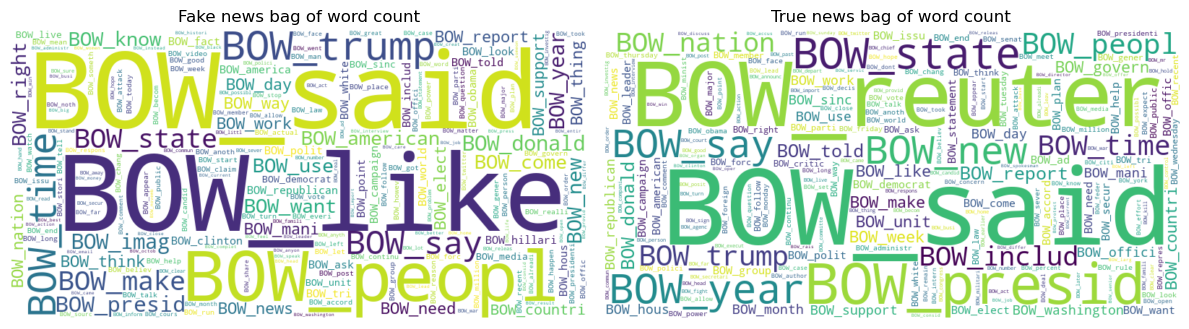

In [6]:
wordcloud_zero = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(new_df['label_zero'])

# Generate word cloud for label_one
wordcloud_one = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(new_df['label_one'])

# Display the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_zero, interpolation='bilinear')
plt.title('Fake news bag of word count')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_one, interpolation='bilinear')
plt.title('True news bag of word count')
plt.axis('off')

plt.tight_layout()
plt.show()

In [7]:
sorted_label_zero = new_df['label_zero'].sort_values(ascending=False)
sorted_label_zero.head(10)

BOW_like      12203
BOW_said      12171
BOW_peopl     11979
BOW_trump     11644
BOW_time      10826
BOW_say       10648
BOW_state      9755
BOW_make       9610
BOW_presid     9458
BOW_imag       8834
Name: label_zero, dtype: int64

In [8]:
sorted_label_zero = new_df['label_one'].sort_values(ascending=False)
sorted_label_zero.head(10)

BOW_said      28486
BOW_reuter    20047
BOW_presid    18449
BOW_state     18271
BOW_year      16561
BOW_new       15038
BOW_say       14895
BOW_peopl     14535
BOW_trump     13950
BOW_time      13431
Name: label_one, dtype: int64

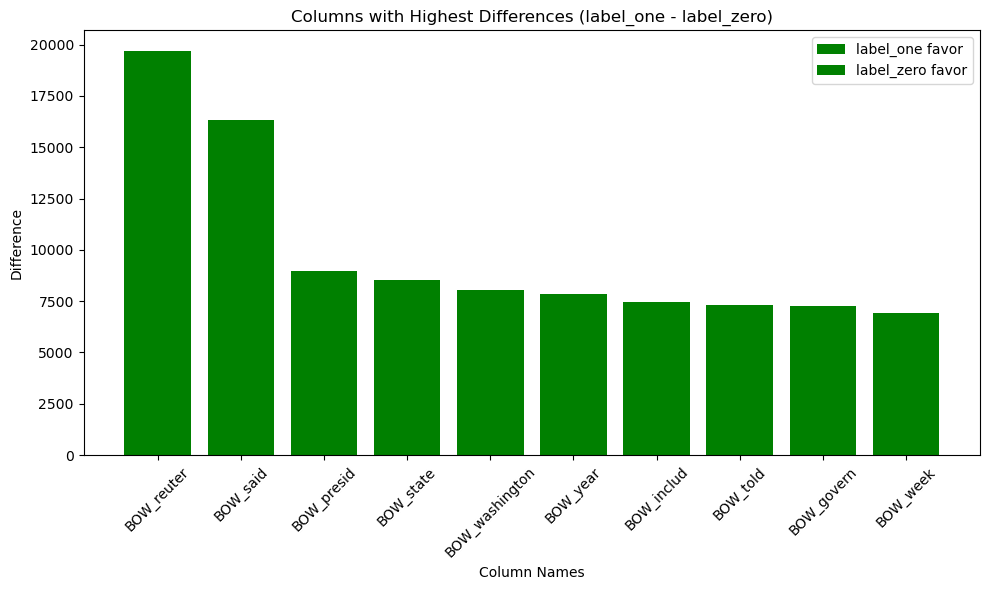

In [9]:
new_df['difference'] = new_df['label_one'] - new_df['label_zero']

# Display columns with the highest differences
top_differences = new_df.nlargest(10, 'difference')

# Plotting the columns with the highest differences with colors based on the direction of the difference
plt.figure(figsize=(10, 6))

bars = plt.bar(top_differences.index, top_differences['difference'], color=['green' if diff > 0 else 'red' for diff in top_differences['difference']])
plt.title('Columns with Highest Differences (label_one - label_zero)')
plt.xlabel('Column Names')
plt.ylabel('Difference')

# Adding legend for clarification
plt.legend(handles=[bars[0], bars[-1]], labels=['label_one favor', 'label_zero favor'])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()